In [1]:
import numpy as np
import nltk
import pandas as pd
import sklearn
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import tensorflow


2022-11-14 09:09:32.537776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
##################################################################################
# ANN - CNN - RNN
# Movies Dataset
# https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format
##################################################################################
TrainData = pd.read_csv("Train.csv")
print(TrainData.head())

TestData = pd.read_csv("Test.csv")

ValidData = pd.read_csv("Valid.csv")

# Clean Up Data, Tokenize and Vectorize

ReviewsLIST = []  ## from the text column
LabelLIST = []

for nextreview, nextlabel in zip(TrainData["text"], TrainData["label"]):
    ReviewsLIST.append(nextreview)
    LabelLIST.append(nextlabel)

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


In [3]:
from tqdm import tqdm_notebook as tqdm
# ----------------------------------------
# Use NLTK's PorterStemmer in a function - Stemming
# -------------------------------------------------------
A_STEMMER = PorterStemmer()


def MY_STEMMER(str_input):
    # Only use letters, no punct, no nums, make lowercase...
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [A_STEMMER.stem(word) for word in words]
    return words


#########################################
#  Build the labeled dataframe
#  Get the Vocab  - here keeping top 10,000
######################################################

# Vectorize
# Instantiate your CV
MyCountV = CountVectorizer(
    input="content",
    lowercase=True,
    stop_words="english",  # Remove stopwords
    tokenizer=MY_STEMMER,  # Stemming
    max_features=10000  # This can be updated
)

# Use your CV
MyDTM = MyCountV.fit_transform(ReviewsLIST)  # create a sparse matrix
ColumnNames = MyCountV.get_feature_names()  # This is the vocab

# clean up the columns
MyDTM_DF = pd.DataFrame(MyDTM.toarray(), columns=ColumnNames)
# Convert the labels from list to df
Labels_DF = pd.DataFrame(LabelLIST, columns=['LABEL'])

for nextcol in tqdm(MyDTM_DF.columns):
    # The following will remove all columns that contains numbers
    if str.isdigit(nextcol):
        MyDTM_DF = MyDTM_DF.drop([nextcol], axis=1)

    # The following will remove any column with name of 3 or smaller - like "it" or "of" or "pre".
    elif len(str(nextcol)) < 3:
        print(nextcol)
        MyDTM_DF = MyDTM_DF.drop([nextcol], axis=1)

# Save original DF - without the lables
My_Orig_DF = MyDTM_DF


/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_

  0%|          | 0/10000 [00:00<?, ?it/s]

-
--
-d
ab
ad
ah
al
au
aw
ax
b
b-
bo
br
bs
bu
c
c-
ca
cb
cd
cg
ch
ck
cr
d
d-
da
dc
di
dj
dp
dr
du
dv
e
ed
eh
el
em
en
er
et
ex
f
f-
ff
fi
ft
fu
fx
g
ga
gi
gu
h
ha
hi
hk
ho
hr
id
ii
il
im
iq
ir
iv
j
je
jo
jr
k
l
la
lb
le
li
ll
lo
lt
m
ma
mc
mi
mj
mm
mo
mr
ms
n
na
nd
ne
nt
ny
o
oh
ok
ol
om
oz
p
pa
pb
pc
pg
pi
pm
po
pr
ps
q
r
rd
rv
s
s-
sa
se
sf
sh
si
sp
sr
ss
st
su
t
ta
th
ts
tv
ty
u
uh
uk
um
v
ve
vh
vs
w
wa
wb
wu
ww
x
y
ya
ye
yo
yr
z
zu


In [4]:
## Now - let's create a complete and labeled
## dataframe:
dfs = [Labels_DF, MyDTM_DF]
print(dfs)

Final_DF_Labeled = pd.concat(dfs, axis=1, join='inner')
## DF with labels
print(Final_DF_Labeled.iloc[:, 0:2])
print(Final_DF_Labeled.shape)

## Create list of all words
print(Final_DF_Labeled.columns[0])
NumCols = Final_DF_Labeled.shape[1]
print(NumCols)
print(len(list(Final_DF_Labeled.columns)))

top_words = list(Final_DF_Labeled.columns[1:NumCols + 1])
## Exclude the Label
print(top_words[0])
print(top_words[-1])

print(type(top_words))
print(top_words.index("aamir"))  ## index 0 in top_words
print(top_words.index("zucco"))  # index NumCols - 2 in top_words



[       LABEL
0          0
1          0
2          0
3          0
4          1
...      ...
39995      1
39996      1
39997      0
39998      1
39999      1

[40000 rows x 1 columns],        ---  --the  -and  -hour  -minut  -someth  -the  -year  -year-old  \
0        0      0     0      0       0        0     0      0          0   
1        0      0     0      0       0        0     0      0          0   
2        0      0     0      0       0        0     0      0          0   
3        0      0     0      0       0        0     0      0          0   
4        0      0     0      0       0        0     0      0          0   
...    ...    ...   ...    ...     ...      ...   ...    ...        ...   
39995    0      0     0      0       0        0     0      0          0   
39996    0      0     0      0       0        0     0      0          0   
39997    0      0     0      0       0        0     0      0          0   
39998    0      0     0      0       0        0     0      0      

In [5]:

## Encoding the data
def Encode(review):
    words = review.split()
    # print(words)
    if len(words) > 500:
        words = words[:500]
        # print(words)
    encoding = []
    for word in words:
        try:
            index = top_words.index(word)
        except:
            index = (NumCols - 1)
        encoding.append(index)
    while len(encoding) < 500:
        encoding.append(NumCols)
    return encoding


##-------------------------------------------------------
## Test the code to assure that it is
## doing what you think it should

result1 = Encode("aaron aamir abbey abbott abilities zucco ")
print(result1)
result2 = Encode("york young younger youngest youngsters youth youthful youtube zach zane zany zealand zellweger")
print(result2)
print(len(result2))  ## Will be 500 because we set it that way above
##-----------------------------------------------------------




[12, 11, 15, 18, 9845, 9843, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846, 9846,

In [6]:
###################################
## Now we are ready to encode all of our
## reviews - which are called "text" in
## our dataset.

# Using vocab from above i -  convert reviews (text) into numerical form
# Replacing each word with its corresponding integer index value from the
# vocabulary. Words not in the vocab will
# be assigned  as the max length of the vocab + 1
## ########################################################

# Encode our training and testing datasets
# with same vocab.

print(TestData.head(10))
print(TestData.shape)
print(TrainData.shape)

############### Final Training and Testing data and labels-----------------
training_data = np.array([Encode(review) for review in tqdm(TrainData["text"])])
print(training_data[20])
print(training_data.shape)

testing_data = np.array([Encode(review) for review in tqdm(TestData['text'])])
print(testing_data[20])

validation_data = np.array([Encode(review) for review in tqdm(ValidData['text']])

print(training_data.shape, testing_data.shape)

## Prepare the labels if they are not already 0 and 1. In our case they are
## so these lines are commented out and just FYI
# train_labels = [1 if label=='positive' else 0 for sentiment in TrainData['label']]
# test_labels = [1 if label=='positive' else 0 for sentiment in TestData['label']]
train_labels = np.array([TrainData['label']])
train_labels = train_labels.T
print(train_labels.shape)
test_labels = np.array([TestData['label']])
test_labels = test_labels.T
print(test_labels.shape)

                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0
5  I saw this film on September 1st, 2005 in Indi...      1
6  I saw a screening of this movie last night. I ...      0
7  William Hurt may not be an American matinee id...      1
8  IT IS A PIECE OF CRAP! not funny at all. durin...      0
9  I'M BOUT IT(1997)<br /><br />Developed & publi...      0
(5000, 2)
(40000, 2)


/var/folders/3l/yzh9j02x7bxd463cl1x0_2lh0000gn/T/ipykernel_14704/1133915472.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  training_data = np.array([Encode(review) for review in tqdm(TrainData["text"])])


  0%|          | 0/40000 [00:00<?, ?it/s]

[9845 9845 9845 4007 9845 9845 9845 9845 9387 9845 9845 9845 9845 9845
 9845 9845 9845 9845 9845 4042 9845 9845 9845 9845 9845 9845 9845 9845
 9845 7560 9845 9845 9845 9845 9845  165 9845 9845 9845 4291 9845 9845
 9845 9845 9845 9845 9845 9845 9845 9845 9845 3676 9845 9845 9845 9845
 9845 9845 9845 1418 9845 9845 9845 3753 9845 9845 9845 9845 9845 9845
 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845
 4751 9845 5940 9845 9845 9845 9845 3676 9845 9845 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 

/var/folders/3l/yzh9j02x7bxd463cl1x0_2lh0000gn/T/ipykernel_14704/1133915472.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  testing_data = np.array([Encode(review) for review in tqdm(TestData['text'])])


  0%|          | 0/5000 [00:00<?, ?it/s]

[9845 9845 9845 9845 9807 9845 5515 9845 9713 9845 9845 9845 9845 9845
 9845 9845 3165 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845
 2373 9845 3753 4683 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845
 9845 9845 9845 9845 4185 9845 9845 9845 9727 9845 9845 9845 9845 9845
 9845 9845 5433 9845 3072 9845 9845 9845 9845 2373 9845 9845 3229 4683
 9845 9845 9845 3753 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845
 9845 9845 9845 9845 9845 7391 9845 9845 9845 9845 9845 7675 9845 9845
 9845 9845 9845 7074 9845 9845 9845 9845 9845 9845 9845 9845 9845 9845
 9845 5077 9845 9845 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846 9846
 9846 

/var/folders/3l/yzh9j02x7bxd463cl1x0_2lh0000gn/T/ipykernel_14704/1133915472.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  validation_data = np.array([Encode(review) for review in tqdm(ValidData['text'])])


  0%|          | 0/5000 [00:00<?, ?it/s]

(40000, 500) (5000, 500)
(40000, 1)
(5000, 1)


In [32]:
from sklearn.metrics import confusion_matrix
def eval_model(model):
    print("Evaluate model on test data")
    results = model.evaluate(testing_data, test_labels, batch_size=256)
    print("test loss, test acc:", results)

    # Generate a prediction using model.predict() 
    # and calculate it's shape:
    print("Generate a prediction")
    prediction = model.predict(testing_data)
    print(prediction)
    prediction[prediction > .5] = 1
    prediction[prediction <= .5] = 0
    print(prediction)
    print(prediction.shape)
    print(confusion_matrix(prediction, test_labels))

In [57]:
###############################
## ANN
#################################
## Simple Dense NN for sentiment analysis (classification 0 neg, 1 pos)
# First layer: Embedding Layer (Keras Embedding Layer) that will learn embeddings 
# for different words .
## RE: ## https://keras.io/api/layers/core_layers/embedding/
## input_dim: Integer. Size of the vocabulary
## input_length: Length of input sequences, when it is constant.
print(NumCols)   
input_dim = NumCols + 1 
 #https://www.tensorflow.org/api_docs/python/tf/keras/Input
input_data = tensorflow.keras.layers.Input(shape=(500))
 #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=64, input_length=500)(input_data)
##input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1
## Good tutorial for this concept:
    ## https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce
 #output_dim: Integer. Dimension of the dense embedding.
 # output_dim: This is the size of the vector space in which words will be embedded. 
 #It defines the size of the output vectors from this layer for each word. 
 # For example, it could be 32 or 100 or even larger.
 #https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#  In an embedding, words are represented by dense vectors where a vector represents 
#  the projection of the word into a continuous vector space.
# The position of a word within the vector space is learned 
# from text and is based on the words that surround the word when it is used.
# The position of a word in the learned vector space is referred to as its embedding.
data = tensorflow.keras.layers.Flatten()(data)
 #Dense layers require inputs as (batch_size, input_size) 
data = tensorflow.keras.layers.Dense(16)(data)
data = tensorflow.keras.layers.Activation('relu')(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(8)(data)
data = tensorflow.keras.layers.Activation('relu')(data)

data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(4)(data)
data = tensorflow.keras.layers.Activation('sigmoid')(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))

eval_model(model)



9846
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 500, 64)           630208    
                                                                 
 flatten_3 (Flatten)         (None, 32000)             0         
                                                                 
 dense_24 (Dense)            (None, 16)                512016    
                                                                 
 activation_23 (Activation)  (None, 16)                0         
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 8)                

In [34]:

###################################
## RNN
###############################################
 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
 #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.SimpleRNN(50))(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))

eval_model(model)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 500, 32)           315104    
                                                                 
 bidirectional (Bidirectiona  (None, 100)              8300      
 l)                                                              
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
 activation_20 (Activation)  (None, 1)                 0         
                                                                 
Total params: 323,505
Trainable params: 323,505
Non-trainable params: 0
_____________________________________________________

In [35]:

############################################
## LSTM
#############################################
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
 
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(50))(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

model.fit(training_data, train_labels, epochs=10, batch_size=128, validation_data=(testing_data, test_labels))

eval_model(model)


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 500, 32)           315104    
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              33200     
 nal)                                                            
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
 activation_21 (Activation)  (None, 1)                 0         
                                                                 
Total params: 348,405
Trainable params: 348,405
Non-trainable params: 0
_____________________________________________________

In [36]:

######################################
## CNN
########################################
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
 
data = tensorflow.keras.layers.Conv1D(50, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Conv1D(40, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Flatten()(data)
 
data = tensorflow.keras.layers.Dense(20)(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))

eval_model(model)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 500, 32)           315104    
                                                                 
 conv1d (Conv1D)             (None, 498, 50)           4850      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 249, 50)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 247, 40)           6040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 123, 40)          0         
 1D)                                                       

In [44]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("Train.csv")
print(data.head())

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


In [54]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

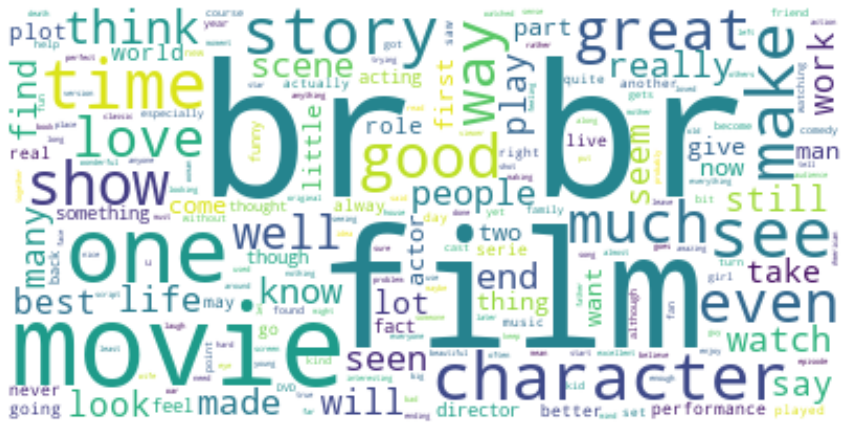

In [55]:
text = " ".join(i for i in data_pos.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

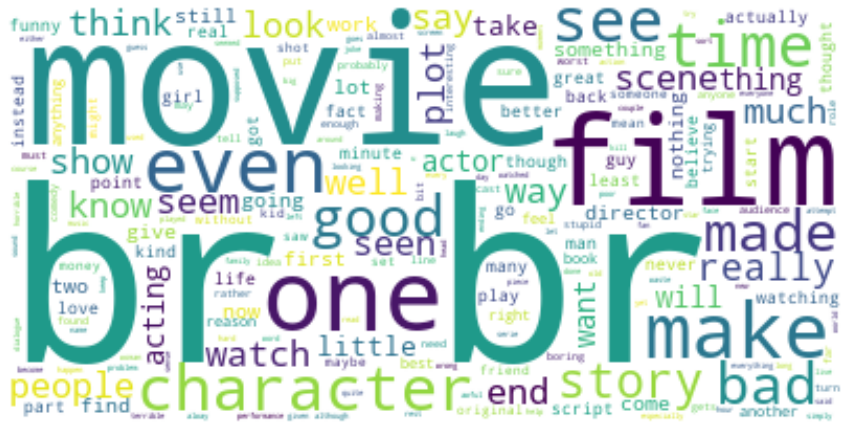

In [56]:
text = " ".join(i for i in data_neg.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Response [200]>
{'status': 'ok', 'totalResults': 16272, 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Lux Alptraum', 'title': 'The human threat to abortion seekers', 'description': 'The end of Roe v. Wade has reinvigorated fears about data security, but the weakest link for abortion seekers is often other people.', 'url': 'https://www.theverge.com/23385553/abortion-seekers-security-threats-human-factor', 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/v306QQO0km-eNJHACVZ3U0IGUkA=/0x0:3000x2000/1200x628/filters:focal(1500x1000:1501x1001)/cdn.vox-cdn.com/uploads/chorus_asset/file/24077781/5_vincentkilbride_theverge_cybersecurity.jpg', 'publishedAt': '2022-10-15T13:00:00Z', 'content': 'The human threat to abortion seekers\r\nThe human threat to abortion seekers\r\n / Apps and data matter \xa0but people are often a weaker link\r\nIn the years before Roe v. Wade, an anonymous group of Chicago… [+7421 chars]'}, {'source': {'id': 'bbc-news', 'name': 'BBC News'},

<Response [200]>
{'status': 'ok', 'totalResults': 66020, 'articles': [{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Chris Stokel-Walker', 'title': 'Twitter’s Ex-Election Chief Is Worried About the US Midterms', 'description': 'Edward Perez says that “manufactured chaos” by bad actors will be even riskier thanks to Elon Musk’s own mayhem.', 'url': 'https://www.wired.com/story/twitter-election-integrity-2022-midterms/', 'urlToImage': 'https://media.wired.com/photos/6365c3d87484c01b9b6e964f/191:100/w_1280,c_limit/Twitter%E2%80%99s-Ex-Election-Chief-Is-Worried-About-the-US-Midterms-Security-GettyImages-83273505.jpg', 'publishedAt': '2022-11-07T12:00:00Z', 'content': 'The staff shortages worry those monitoring the elections too. I spoke to Elon Musk, Jessica González, co-CEO of US media advocacy group Free Press, said at a press conference on Friday. He promised t… [+4073 chars]'}, {'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Dhruv Mehrotra', 'title': 'Inside the ‘Elect

/var/folders/3l/yzh9j02x7bxd463cl1x0_2lh0000gn/T/ipykernel_14704/4277461176.py:222: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  BBC_DF = pd.read_csv(filename, error_bad_lines=False)
/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


      LABEL        Date     Source  \
0  abortion  2022-10-15  The Verge   
1  abortion  2022-11-09   BBC News   
2  abortion  2022-11-10        CNN   
3  abortion  2022-11-06   BBC News   
4  abortion  2022-11-01   BBC News   

                                               Title  \
0               The human threat to abortion seekers   
1  Abortion election results Vermont first to put...   
2  Opinion The biggest lesson of the midterm elec...   
3  US midterms Why abortion matters in these cruc...   
4  US midterm elections Abortion will decide how ...   

                                            Headline  
0  Wade reinvigorated fears about data security w...  
1  Four other states have voted abortion rights i...  
2  past several weeks pundits warned that Democra...  
3  Inflation voters issue Democrats hope anger ov...  
4  Paxton Melanie have very different views wheth...  
LABEL
Date
Source
Title
Headline
0      Wade reinvigorated fears about data security w...
1      Four ot

        LABEL  abortions  ahead  biden  close  constitution  control  country  \
100  election          0      0      0      0             0        0        0   
101  election          0      0      0      0             0        0        0   
102  election          0      0      0      0             0        0        0   
103  election          0      0      0      0             0        0        0   
104  election          0      0      0      0             0        0        0   
..        ...        ...    ...    ...    ...           ...      ...      ...   
195  election          0      0      1      0             0        0        0   
196  election          0      0      0      0             0        0        0   
197  election          0      0      0      0             0        0        0   
198  election          0      0      1      0             0        0        0   
199  election          0      0      0      0             0        0        0   

     court  democratic  ...

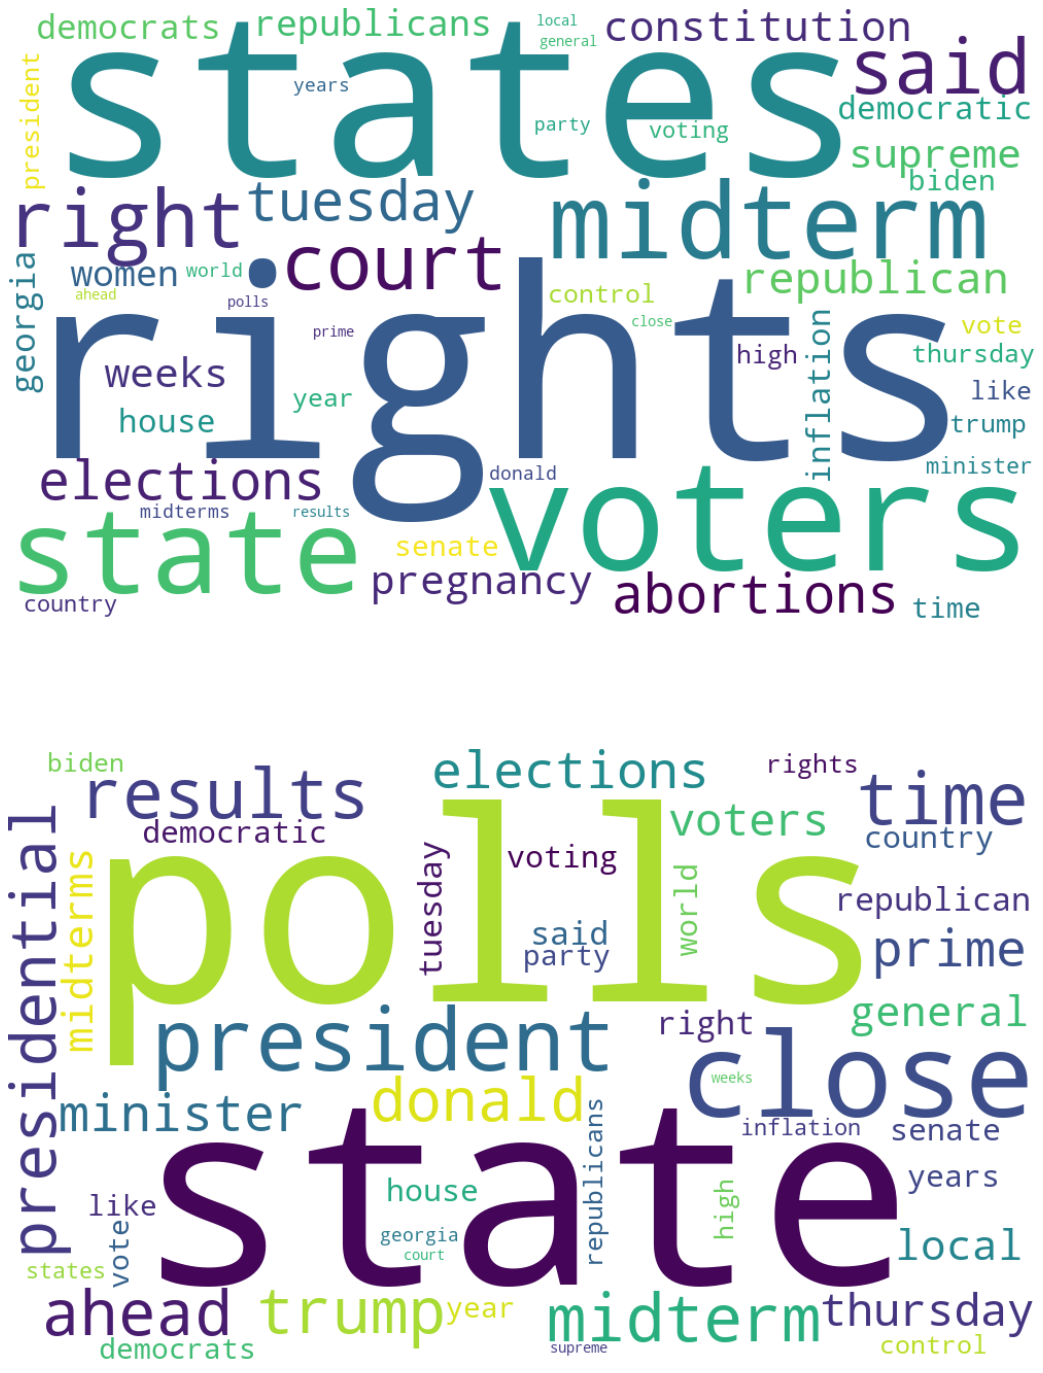

In [58]:
# Data gathering via API - URLs and GET
# Cleaning and preparing text DATA
# DTM and Data Frames
# Training and Testing at DT

#########################################
# https://newsapi.org/ for register an API key
#########################################

# Example URL
# https://newsapi.org/v2/everything?
# q=tesla&from=2021-05-20&sortBy=publishedAt&
# apiKey="1df08f5f5fd54b8eb321e7d512acd363"

# What to import
import requests
import re
import pandas as pd
from pandas import DataFrame

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# import PIL
# import Pillow
# import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
# from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import graphviz

from sklearn.decomposition import LatentDirichletAllocation

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

####################################
##
##  Step 1: Connect to the server
##          Send a query
##          Collect and clean the
##          results
####################################

####################################################
##In the following loop, we will query the newsapi servers
##for all the topic names in the list
## We will then build a large csv file
## where each article is a row
##
## From there, we will convert this data
## into a labeled dataframe
## so we can train and then test our DT
## model
####################################################

####################################################
## Build the URL and GET the results
## NOTE: At the bottom of this code
## commented out, you will find a second
## method for doing the following. This is FYI.
####################################################

## This is the endpoint - the server and
## location on the server where your data
## will be retrieved from

## TEST FIRST!
## We are about to build this URL:
## https://newsapi.org/v2/everything?apiKey=8f4134 your key here 0f22b&q=bitcoin


topics = ["abortion", "election"]

## topics needs to be a list of strings (words)
## Next, let's build the csv file
## first and add the column names
## Create a new csv file to save the headlines
filename = "NewHeadlines.csv"
MyFILE = open(filename, "w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis = "LABEL,Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

## CHeck it! Can you find this file?

#### --------------------> GATHER - CLEAN - CREATE FILE

## RE: documentation and options
## https://newsapi.org/docs/endpoints/everything

endpoint = "https://newsapi.org/v2/everything"

################# enter for loop to collect
################# data on three topics
#######################################

for topic in topics:

    ## Dictionary Structure
    URLPost = {'apiKey': '1df08f5f5fd54b8eb321e7d512acd363',
               'q': topic
               }

    response = requests.get(endpoint, URLPost)
    print(response)
    jsontxt = response.json()
    print(jsontxt)
    #####################################################

    ## Open the file for append
    MyFILE = open(filename, "a")
    LABEL = topic
    for items in jsontxt["articles"]:
        print(items, "\n\n\n")

        # Author=items["author"]
        # Author=str(Author)
        # Author=Author.replace(',', '')

        Source = items["source"]["name"]
        print(Source)

        Date = items["publishedAt"]
        ##clean up the date
        NewDate = Date.split("T")
        Date = NewDate[0]
        print(Date)

        ## CLEAN the Title
        ##----------------------------------------------------------
        ##Replace punctuation with space
        # Accept one or more copies of punctuation
        # plus zero or more copies of a space
        # and replace it with a single space
        Title = items["title"]
        Title = str(Title)
        # print(Title)
        Title = re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
        Title = re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
        Title = re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)

        # and replace it with a single space
        ## NOTE: Using the "^" on the inside of the [] means
        ## we want to look for any chars NOT a-z or A-Z and replace
        ## them with blank. This removes chars that should not be there.
        Title = re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
        Title = Title.replace(',', '')
        Title = ' '.join(Title.split())
        Title = re.sub("\n|\r", "", Title)
        print(Title)
        ##----------------------------------------------------------

        Headline = items["description"]
        Headline = str(Headline)
        Headline = re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
        Headline = re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
        Headline = re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
        Headline = re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
        ## Be sure there are no commas in the headlines or it will
        ## write poorly to a csv file....
        Headline = Headline.replace(',', '')
        Headline = ' '.join(Headline.split())
        Headline = re.sub("\n|\r", "", Headline)

        ### AS AN OPTION - remove words of a given length............
        Headline = ' '.join([wd for wd in Headline.split() if len(wd) > 3])

        # print("Author: ", Author, "\n")
        # print("Title: ", Title, "\n")
        # print("Headline News Item: ", Headline, "\n\n")

        # print(Author)
        print(Title)
        print(Headline)

        WriteThis = str(LABEL) + "," + str(Date) + "," + str(Source) + "," + str(Title) + "," + str(Headline) + "\n"
        print(WriteThis)

        MyFILE.write(WriteThis)

    ## CLOSE THE FILE
    MyFILE.close()

################## END for loop

####################################################
##
## Where are we now?
##
## So far, we have created a csv file
## with labeled data. Each row is a news article
##
## - BUT -
## We are not done. We need to choose which
## parts of this data to use to model our decision tree
## and we need to convert the data into a data frame.
##
########################################################


BBC_DF = pd.read_csv(filename, error_bad_lines=False)
print(BBC_DF.head())
# iterating the columns
for col in BBC_DF.columns:
    print(col)

print(BBC_DF["Headline"])

## REMOVE any rows with NaN in them
BBC_DF = BBC_DF.dropna()
print(BBC_DF["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
## Keep the labels!

HeadlineLIST = []
LabelLIST = []

for nexthead, nextlabel in zip(BBC_DF["Headline"], BBC_DF["LABEL"]):
    HeadlineLIST.append(nexthead)
    LabelLIST.append(nextlabel)

print("The headline list is:\n")
print(HeadlineLIST)

print("The label list is:\n")
print(LabelLIST)

##########################################
## Remove all words that match the topics.
## For example, if the topics are food and covid
## remove these exact words.
##
## We will need to do this by hand.
NewHeadlineLIST = []

for element in HeadlineLIST:
    print(element)
    print(type(element))
    ## make into list
    AllWords = element.split(" ")
    print(AllWords)

    ## Now remove words that are in your topics
    NewWordsList = []
    for word in AllWords:
        print(word)
        word = word.lower()
        if word in topics:
            print(word)
        else:
            NewWordsList.append(word)

    ##turn back to string
    NewWords = " ".join(NewWordsList)
    ## Place into NewHeadlineLIST
    NewHeadlineLIST.append(NewWords)

##
## Set the     HeadlineLIST to the new one
HeadlineLIST = NewHeadlineLIST
print(HeadlineLIST)
#########################################
##
##  Build the labeled dataframe
##
######################################################

### Vectorize
## Instantiate your CV
MyCountV = CountVectorizer(
    input="content",  ## because we have a csv file
    lowercase=True,
    stop_words="english",
    max_features=50
)

## Use your CV
MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
print(type(MyDTM))

ColumnNames = MyCountV.get_feature_names()
# print(type(ColumnNames))


## Build the data frame
MyDTM_DF = pd.DataFrame(MyDTM.toarray(), columns=ColumnNames)

## Convert the labels from list to df
Labels_DF = DataFrame(LabelLIST, columns=['LABEL'])

## Check your new DF and you new Labels df:
print("Labels\n")
print(Labels_DF)
print("News df\n")
print(MyDTM_DF.iloc[:, 0:6])

##Save original DF - without the lables
My_Orig_DF = MyDTM_DF
print(My_Orig_DF)
######################
## AND - just to make sure our dataframe is fair
## let's remove columns called:
## food, bitcoin, and sports (as these are label names)
######################
# MyDTM_DF=MyDTM_DF.drop(topics, axis=1)


## Now - let's create a complete and labeled
## dataframe:
dfs = [Labels_DF, MyDTM_DF]
print(dfs)

Final_News_DF_Labeled = pd.concat(dfs, axis=1, join='inner')
## DF with labels
print(Final_News_DF_Labeled)

#############################################
##
## Create Training and Testing Data
##
## Then model and test the Decision Tree
##
################################################


## Before we start our modeling, let's visualize and
## explore.

##It might be very interesting to see the word clouds
## for each  of the topics.
##--------------------------------------------------------
List_of_WC = []

for mytopic in topics:
    tempdf = Final_News_DF_Labeled[Final_News_DF_Labeled['LABEL'] == mytopic]
    print(tempdf)

    tempdf = tempdf.sum(axis=0, numeric_only=True)
    # print(tempdf)

    # Make var name
    NextVarName = str("wc" + str(mytopic))
    # print( NextVarName)

    ##In the same folder as this code, I have three images
    ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
    # next_image=str(str(mytopic) + ".jpg")
    # print(next_image)

    ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

    ###########
    ## Create and store in a list the wordcloud OBJECTS
    #########
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                            min_word_length=4,  # mask=next_image,
                            max_words=400).generate_from_frequencies(tempdf)

    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)

##------------------------------------------------------------------
print(List_of_WC)
##########
########## Create the wordclouds
##########
fig = plt.figure(figsize=(25, 25))
# figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics = len(topics)
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics, 1, i + 1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds.pdf")

In [62]:
print(My_Orig_DF)

     abortions  ahead  biden  close  constitution  control  country  court  \
0            0      0      0      0             0        0        0      0   
1            0      0      0      1             0        0        0      0   
2            0      0      0      0             0        0        0      1   
3            0      0      0      0             0        0        0      0   
4            0      0      0      0             0        0        0      0   
..         ...    ...    ...    ...           ...      ...      ...    ...   
195          0      0      1      0             0        0        0      0   
196          0      0      0      0             0        0        0      0   
197          0      0      0      0             0        0        0      0   
198          0      0      1      0             0        0        0      0   
199          0      0      0      0             0        0        0      0   

     democratic  democrats  ...  trump  tuesday  vote  voters  

In [63]:
print(Labels_DF)

        LABEL
0    abortion
1    abortion
2    abortion
3    abortion
4    abortion
..        ...
195  election
196  election
197  election
198  election
199  election

[200 rows x 1 columns]


In [68]:
training_data = My_Orig_DF

In [67]:
train_labels = pd.factorize(Labels_DF['LABEL'])[0]
train_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [69]:
NumCols = Final_News_DF_Labeled.shape[1]
print(NumCols)

51


In [83]:
###############################
## ANN
#################################
## Simple Dense NN for sentiment analysis (classification 0 neg, 1 pos)
# First layer: Embedding Layer (Keras Embedding Layer) that will learn embeddings 
# for different words .
## RE: ## https://keras.io/api/layers/core_layers/embedding/
## input_dim: Integer. Size of the vocabulary
## input_length: Length of input sequences, when it is constant.
print(NumCols)   
input_dim = NumCols + 1 
 #https://www.tensorflow.org/api_docs/python/tf/keras/Input
input_data = tensorflow.keras.layers.Input(shape=(50))
 #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=18, input_length=50)(input_data)
##input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1
## Good tutorial for this concept:
    ## https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce
 #output_dim: Integer. Dimension of the dense embedding.
 # output_dim: This is the size of the vector space in which words will be embedded. 
 #It defines the size of the output vectors from this layer for each word. 
 # For example, it could be 32 or 100 or even larger.
 #https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#  In an embedding, words are represented by dense vectors where a vector represents 
#  the projection of the word into a continuous vector space.
# The position of a word within the vector space is learned 
# from text and is based on the words that surround the word when it is used.
# The position of a word in the learned vector space is referred to as its embedding.
data = tensorflow.keras.layers.Flatten()(data)
 #Dense layers require inputs as (batch_size, input_size) 
data = tensorflow.keras.layers.Dense(16)(data)
data = tensorflow.keras.layers.Activation('relu')(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(8)(data)
data = tensorflow.keras.layers.Activation('relu')(data)

data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(4)(data)
data = tensorflow.keras.layers.Activation('sigmoid')(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

model.fit(training_data, train_labels, epochs=10)

51
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 50)]              0         
                                                                 
 embedding_22 (Embedding)    (None, 50, 18)            936       
                                                                 
 flatten_11 (Flatten)        (None, 900)               0         
                                                                 
 dense_57 (Dense)            (None, 16)                14416     
                                                                 
 activation_54 (Activation)  (None, 16)                0         
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_58 (Dense)            (None, 8)                 

In [84]:

###################################
## RNN
###############################################
 
input_data = tensorflow.keras.layers.Input(shape=(50))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=50)(input_data)
 #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.SimpleRNN(50))(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

model.fit(training_data, train_labels, epochs=10)

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 50)]              0         
                                                                 
 embedding_23 (Embedding)    (None, 50, 32)            1664      
                                                                 
 bidirectional_8 (Bidirectio  (None, 100)              8300      
 nal)                                                            
                                                                 
 dense_61 (Dense)            (None, 1)                 101       
                                                                 
 activation_58 (Activation)  (None, 1)                 0         
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
______________________________________________________

In [85]:

############################################
## LSTM
#############################################
input_data = tensorflow.keras.layers.Input(shape=(50))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=50)(input_data)
 
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(50))(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

model.fit(training_data, train_labels, epochs=10)


Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 50)]              0         
                                                                 
 embedding_24 (Embedding)    (None, 50, 32)            1664      
                                                                 
 bidirectional_9 (Bidirectio  (None, 100)              33200     
 nal)                                                            
                                                                 
 dense_62 (Dense)            (None, 1)                 101       
                                                                 
 activation_59 (Activation)  (None, 1)                 0         
                                                                 
Total params: 34,965
Trainable params: 34,965
Non-trainable params: 0
______________________________________________________

In [86]:

######################################
## CNN
########################################
input_data = tensorflow.keras.layers.Input(shape=(50))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=50)(input_data)
 
data = tensorflow.keras.layers.Conv1D(50, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Conv1D(40, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Flatten()(data)
 
data = tensorflow.keras.layers.Dense(20)(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

model.fit(training_data, train_labels, epochs=10)

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 50)]              0         
                                                                 
 embedding_25 (Embedding)    (None, 50, 32)            1664      
                                                                 
 conv1d_12 (Conv1D)          (None, 48, 50)            4850      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 24, 50)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 22, 40)            6040      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 11, 40)           0         
 g1D)                                                     